# ロジスティクス回帰モデル

# ハンズオン

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ作成

In [14]:
n_sample = 100
harf_n_sample = 50
var = .2

# データ生成
def gen_data(n_sample, harf_n_sample):
    # １列目
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    # ２列目
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    # １列目と２列目を結合するとし、説明変数とする
    x_train = np.concatenate([x0, x1])
    # harf_n_sampleで指定された項目までは”0”
    # harf_n_sampleで指定された項目以降は”1”
    y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return x_train, y_train


# データ表示
def plt_data(x_train, y_train):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()

In [15]:
#データ作成 
#  n_sample       ：レコード数
#  harf_n_sample  ：目的変数を設定する際に０と１の境目となる場所
x_train, y_train = gen_data(n_sample, harf_n_sample)

C:\Users\takas\AppData\Local\Temp/ipykernel_6132/493639636.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)


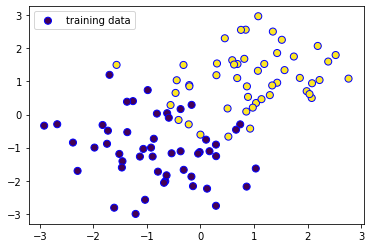

In [16]:
#データ表示
plt_data(x_train, y_train)

In [17]:
# １列目に値が１の列を生成する
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd(X_train, max_iter, eta):
    w = np.zeros(X_train.shape[1])
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= eta * grad
        if np.allclose(w, w_prev):
            return w
    return w


In [19]:
X_train = add_one(x_train)

In [20]:
max_iter=100
eta = 0.01
w = sgd(X_train, max_iter, eta)

# 予測

In [21]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [22]:
X_test = add_one(xx)
proba = sigmoid(np.dot(X_test, w))
y_pred = (proba > 0.5).astype(np.int)

C:\Users\takas\AppData\Local\Temp/ipykernel_6132/395688868.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (proba > 0.5).astype(np.int)


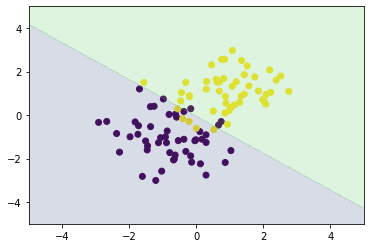

In [23]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))